# Advanced Exploratory Data Analysis with Python
## A Complete Guide to EDA Techniques

**Dataset**: Eccomerce


---

### Daftar isi
1. Produk apa yang memberikan revenue terbesar?
2. Negara mana yang menyumbang penjualan tertinggi?
3. Customer mana yang paling banyak menyumbang pendapatan? (Top buyers)
4. Bagaimana tren revenue per bulan? Apakah ada growth/seasonality?
5. Hari apa yang memiliki transaksi tertinggi berdasarkan Total Revenue? Apakah ada pola penjualan mingguan?

Apakah ada hubungan antara Quantity & UnitPrice terhadap Total Revenue?


## SECTION 1: Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print('Libraries imported successfully!')


Libraries imported successfully!


In [2]:
df = pd.read_csv('ecommerce.csv')

print('Dataset loaded successfully!')
print(f'Shape: {df.shape}')
print(f'\nFirst 5 rows:')
df.head()

Dataset loaded successfully!
Shape: (4870, 8)

First 5 rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom


In [3]:
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

Dataset shape: 4870 rows × 8 columns



## SECTION 2: Data Understanding & Feature Engineering

In [4]:
df.dtypes

,0
InvoiceNo,int64
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,int64
Country,object


In [5]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [6]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,4870.000000,4870.000000,4870.000000,4870.000000
mean,560586.577413,12.945791,2.937057,15291.004312
std,13211.347819,38.145988,4.744515,1709.035002
min,536365.000000,1.000000,0.040000,12347.000000
25%,548861.000000,2.000000,1.250000,13975.000000
50%,561895.000000,5.000000,1.950000,15144.000000
75%,572126.000000,12.000000,3.750000,16793.250000
max,581585.000000,992.000000,145.000000,18283.000000


In [7]:
# Basic data inspection
print('Data Types:')
print(df.dtypes)
print('\n' + '='*70)
print('Missing Values:')
print(df.isnull().sum())
print('\n' + '='*70)
print('Statistical Summary:')
df.describe()

Data Types:
InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

Missing Values:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Statistical Summary:


,InvoiceNo,Quantity,UnitPrice,CustomerID
count,4870.000000,4870.000000,4870.000000,4870.000000
mean,560586.577413,12.945791,2.937057,15291.004312
std,13211.347819,38.145988,4.744515,1709.035002
min,536365.000000,1.000000,0.040000,12347.000000
25%,548861.000000,2.000000,1.250000,13975.000000
50%,561895.000000,5.000000,1.950000,15144.000000
75%,572126.000000,12.000000,3.750000,16793.250000
max,581585.000000,992.000000,145.000000,18283.000000


In [8]:
# Identify column types
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns:', numerical_cols)
print('\nCategorical Columns:', categorical_cols)

Numerical Columns: ['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID']

Categorical Columns: ['StockCode', 'Description', 'InvoiceDate', 'Country']


In [9]:
print('\nCategorical Variables Summary:')
for col in categorical_cols:
    print(f'{col}: {df[col].nunique()} unique values')
    print(f'  Values: {df[col].unique()}')


Categorical Variables Summary:
StockCode: 1773 unique values
  Values: ['21166' '82482' '23192' ... '22838' '84849A' '21125']
Description: 1807 unique values
  Values: ['COOK WITH WINE METAL SIGN ' 'WOODEN PICTURE FRAME WHITE FINISH'
 'BUNDLE OF 3 ALPHABET EXERCISE BOOKS' ... '3 TIER CAKE TIN RED AND CREAM'
 'HELLO SAILOR BLUE SOAP HOLDER' 'SET 6 FOOTBALL CELEBRATION CANDLES']
InvoiceDate: 3757 unique values
  Values: ['5/25/2011 17:31' '7/24/2011 11:58' '7/19/2011 12:54' ...
 '1/7/2011 12:28' '11/3/2011 15:16' '3/23/2011 9:43']
Country: 31 unique values
  Values: ['United Kingdom' 'Germany' 'United Arab Emirates' 'Belgium' 'France'
 'Netherlands' 'Unspecified' 'EIRE' 'Austria' 'Portugal' 'Sweden' 'Cyprus'
 'Spain' 'Switzerland' 'Australia' 'Greece' 'Finland' 'Singapore' 'Norway'
 'Japan' 'Italy' 'Channel Islands' 'RSA' 'Poland' 'Denmark' 'Lebanon'
 'Canada' 'Iceland' 'Brazil' 'Malta' 'Israel']


## SECTION 3: Core EDA Techniques

In [10]:
dfa=df.copy()

In [11]:
dfa["TotalPrice"] = dfa["Quantity"] * dfa["UnitPrice"]

In [12]:
dfa[["Quantity","UnitPrice","TotalPrice"]].describe()


,Quantity,UnitPrice,TotalPrice
count,4870.000000,4870.000000,4870.000000
mean,12.945791,2.937057,22.952754
std,38.145988,4.744515,81.408860
min,1.000000,0.040000,0.120000
25%,2.000000,1.250000,4.250000
50%,5.000000,1.950000,11.400000
75%,12.000000,3.750000,19.800000
max,992.000000,145.000000,3174.400000


In [13]:
df.duplicated().sum()


np.int64(0)

<Axes: >

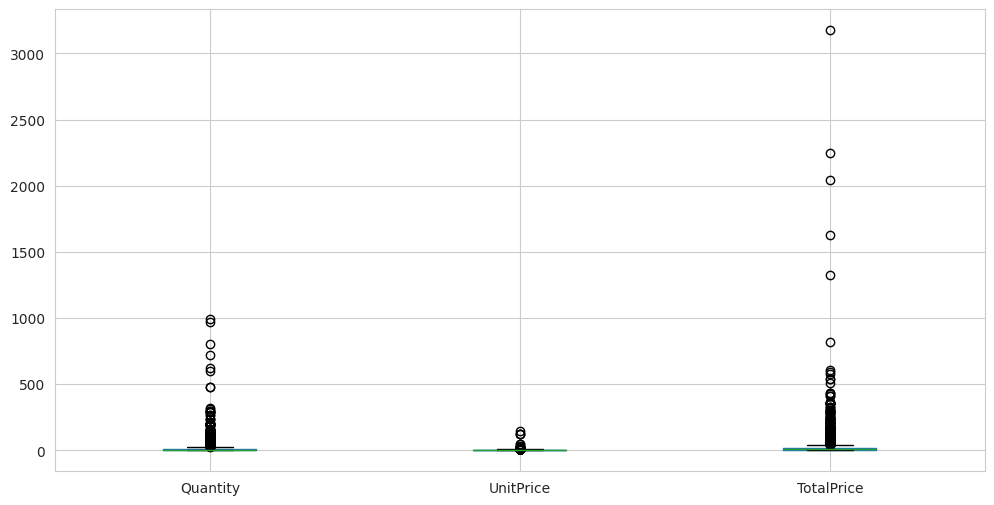

In [14]:
dfa[["Quantity","UnitPrice","TotalPrice"]].boxplot()


In [15]:
for col in ["Quantity","UnitPrice","TotalPrice"]:
    Q1 = dfa[col].quantile(0.25)
    Q3 = dfa[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = ((dfa[col] < lower) | (dfa[col] > upper)).sum()
    lower_outliers = dfa[dfa[col] < lower][col].count()
    upper_outliers = dfa[dfa[col] > upper][col].count()
    print(f"Column: {col}")
    print(f"{col} outliers: {outliers}")
    print(f"  Lower outliers (< {lower:.2f}): {lower_outliers}")
    print(f"  Upper outliers (> {upper:.2f}): {upper_outliers}\n")


Column: Quantity
Quantity outliers: 328
  Lower outliers (< -13.00): 0
  Upper outliers (> 27.00): 328

Column: UnitPrice
UnitPrice outliers: 406
  Lower outliers (< -2.50): 0
  Upper outliers (> 7.50): 406

Column: TotalPrice
TotalPrice outliers: 403
  Lower outliers (< -19.07): 0
  Upper outliers (> 43.12): 403



In [16]:
dfa.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom,2.08
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom,5.10
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom,1.65
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom,15.00
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom,2.55


In [17]:
dfa["InvoiceDate"] = pd.to_datetime(dfa["InvoiceDate"])

In [18]:
dfa.corr(numeric_only=True)


,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalPrice
InvoiceNo,1.000000,-0.028187,-0.061637,0.027120,-0.021428
Quantity,-0.028187,1.000000,-0.083283,-0.008040,0.788586
UnitPrice,-0.061637,-0.083283,1.000000,-0.035106,0.091612
CustomerID,0.027120,-0.008040,-0.035106,1.000000,-0.005556
TotalPrice,-0.021428,0.788586,0.091612,-0.005556,1.000000


In [19]:
(dfa["Quantity"] < 0).sum()


np.int64(0)

In [20]:
(dfa["Quantity"] > 0).sum()

np.int64(4870)

In [21]:
dfa.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,2.08
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,5.10
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,1.65
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,15.00
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,2.55


In [22]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    4870 non-null   int64         
 1   StockCode    4870 non-null   object        
 2   Description  4870 non-null   object        
 3   Quantity     4870 non-null   int64         
 4   InvoiceDate  4870 non-null   datetime64[ns]
 5   UnitPrice    4870 non-null   float64       
 6   CustomerID   4870 non-null   int64         
 7   Country      4870 non-null   object        
 8   TotalPrice   4870 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 342.6+ KB


In [23]:
dfa['DayOfWeek'] = dfa['InvoiceDate'].dt.day_name()
dfa['Hour'] = dfa['InvoiceDate'].dt.hour
dfa['Day'] = dfa['InvoiceDate'].dt.day
dfa['Month'] = dfa['InvoiceDate'].dt.month
dfa['Year'] = dfa['InvoiceDate'].dt.year

dfa.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,Hour,Day,Month,Year
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,2.08,Wednesday,17,25,5,2011
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,5.10,Sunday,11,24,7,2011
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,1.65,Tuesday,12,19,7,2011
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,15.00,Wednesday,11,13,7,2011
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,2.55,Sunday,12,20,2,2011


In [24]:
dfa.shape

(4870, 14)

In [25]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    4870 non-null   int64         
 1   StockCode    4870 non-null   object        
 2   Description  4870 non-null   object        
 3   Quantity     4870 non-null   int64         
 4   InvoiceDate  4870 non-null   datetime64[ns]
 5   UnitPrice    4870 non-null   float64       
 6   CustomerID   4870 non-null   int64         
 7   Country      4870 non-null   object        
 8   TotalPrice   4870 non-null   float64       
 9   DayOfWeek    4870 non-null   object        
 10  Hour         4870 non-null   int32         
 11  Day          4870 non-null   int32         
 12  Month        4870 non-null   int32         
 13  Year         4870 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(3), object(4)
memory usage: 456.7+ KB


#SECTION 4: Analytical Questions & Insights

Question 1. Produk apa yang memberikan revenue terbesar?

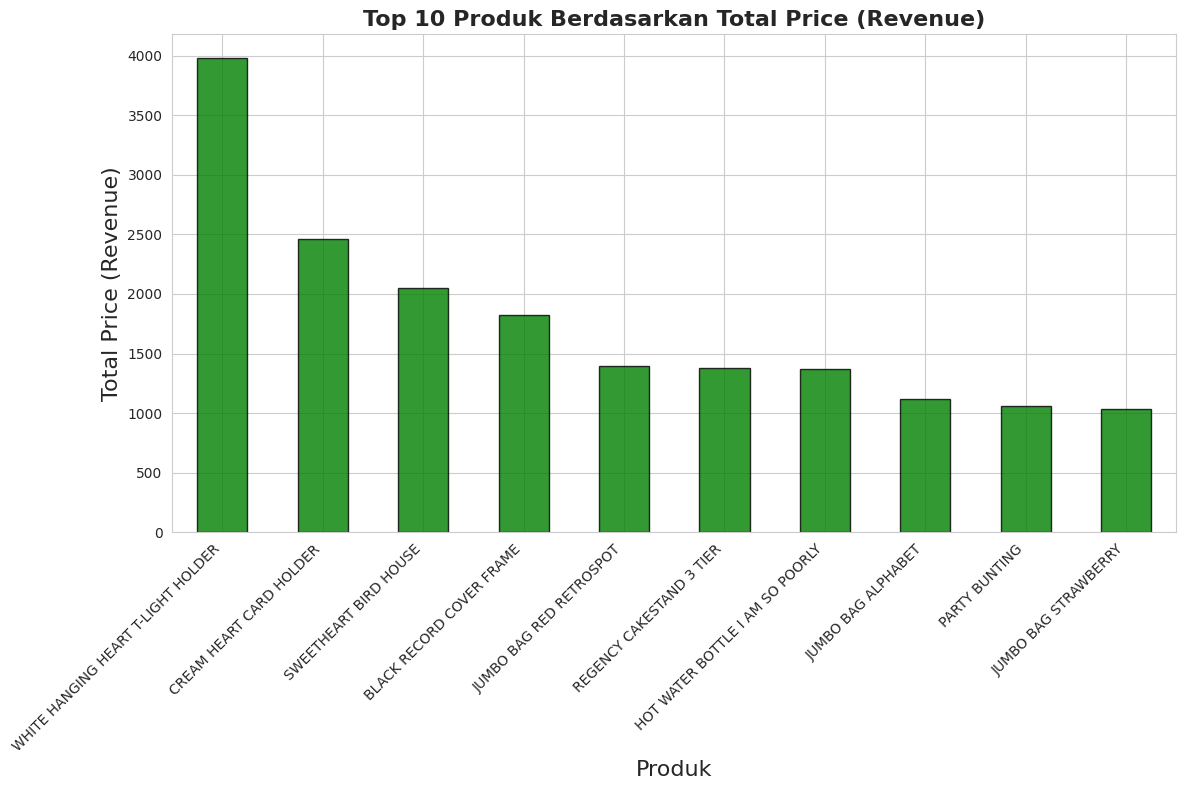

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

top_products = dfa.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
#print(top_products)
ax = top_products.plot(kind='bar', ax=ax, color='green', alpha=0.8, edgecolor='black')
ax.set_title('Top 10 Produk Berdasarkan Total Price (Revenue)', fontsize=16, fontweight='bold')
ax.set_xlabel('Produk', fontsize=16)
ax.set_ylabel('Total Price (Revenue)', fontsize=16)
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

Insight:

Berdsarkan visualisasi, produk yang memberikan kontribusi penjualan tertinggi White Hanging Heart T-Light Holder dengan revenue sebesar 3980, jauh dari produk lainnya. Produk kedua dengan revenue terbesarnya yakni Cream Heart Card Holder sekitar 2462. Paling rendah Jumbo Bg Strawberry sekitar 1039.

Rekomendasi:
- Pastikan produk best seller White Hanging Heart T-Light Holder memiliki stok yang paling banyak.
- Perlu strategi bundling penggabungan dengan produk best seller dengan produk harga terendah tau produk lainnya.


2.Negara mana yang menyumbang penjualan tertinggi?

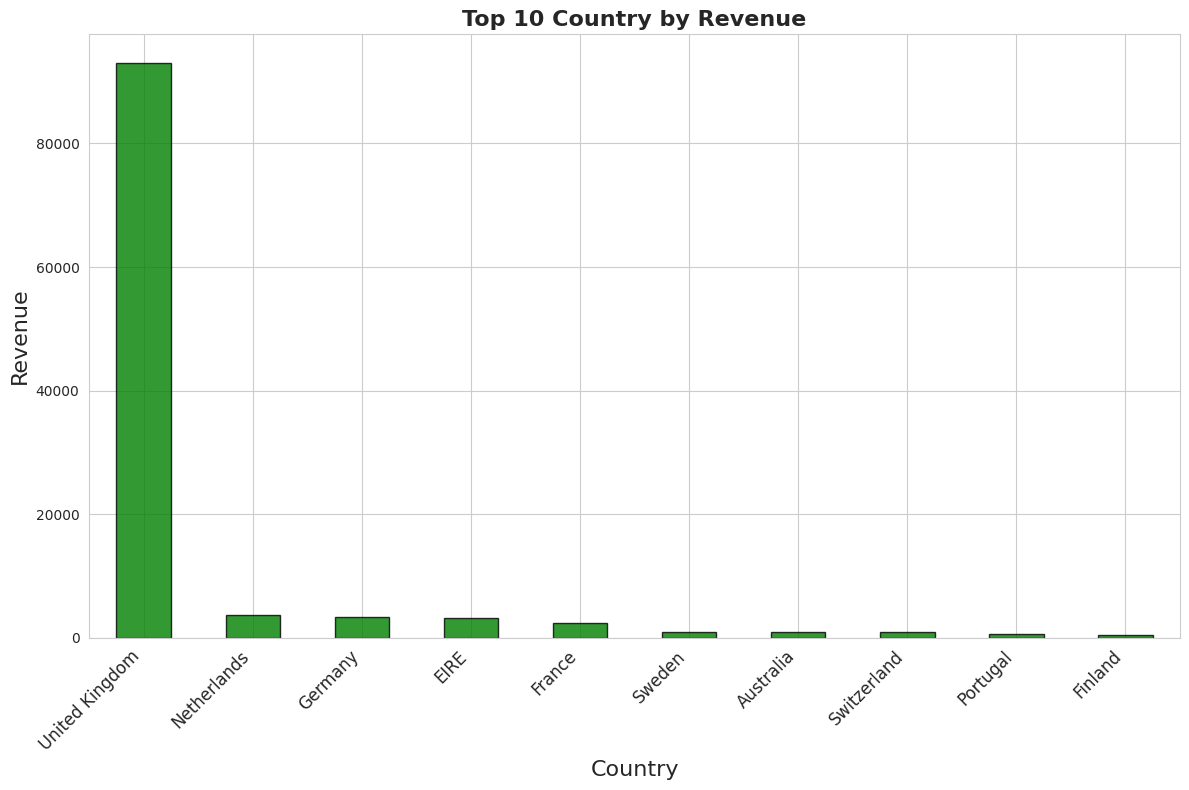

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
country_revenue = dfa.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
#print()



ax = country_revenue.plot(kind='bar', ax=ax, color='green', alpha=0.8, edgecolor='black')
ax.set_title('Top 10 Country by Revenue', fontsize=16, fontweight='bold')
ax.set_xlabel('Country', fontsize=16)
ax.set_ylabel('Revenue', fontsize=16)

plt.xticks(rotation=45, ha='right', fontsize=12)



plt.tight_layout()
plt.show()

Insight:
Berdasarkan visualisasi, UK merupakan pasar dengan kontribusi pendapatan yang sangat dominan, mencapai sekitar 93.011 jauh lebih tinggi terhadao negara lainnya.

Rekomendasi:
- Fokuskan dengan mempertahankan penjualan di UK, alasannya karena ini pasar terkuat.
- tingkatkan promosi dan pemasaran pada Netherlands dan Germany, agar meningkat.

3. Customer mana yang paling banyak menyumbang pendapatan?

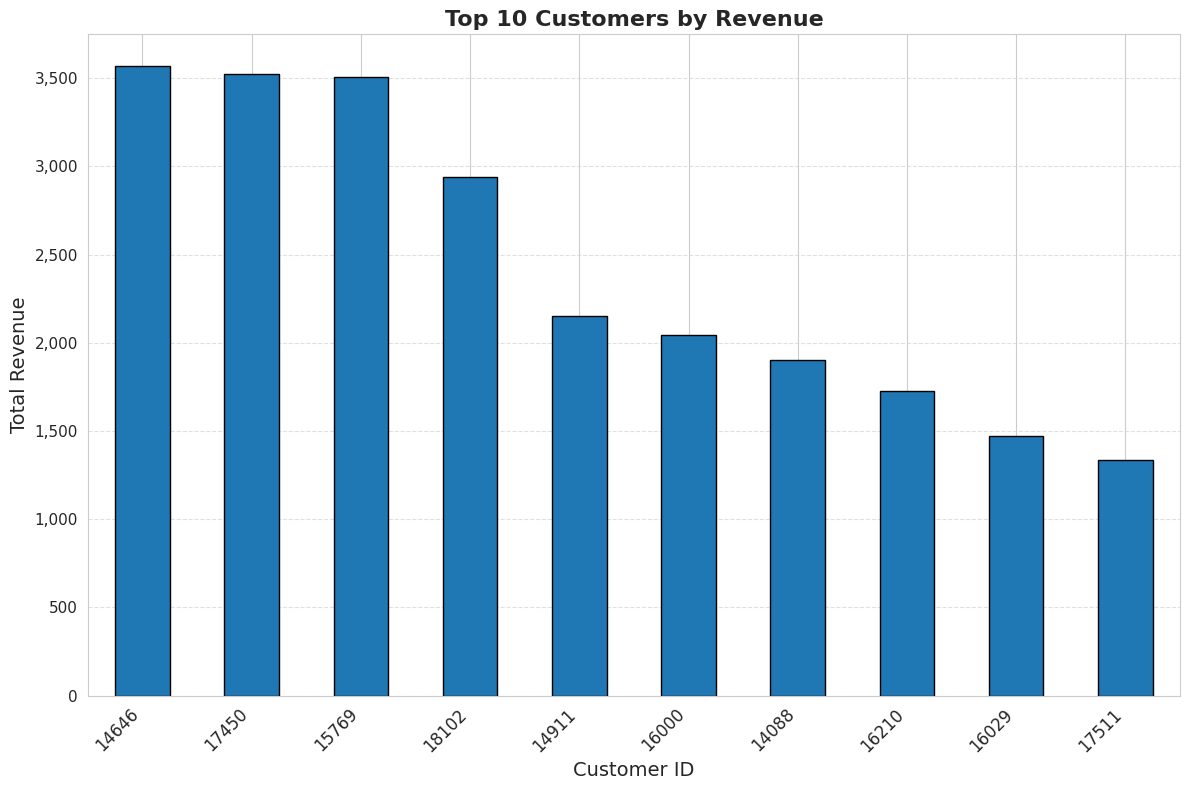

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

top_customers = dfa.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
#print(top_customers)


ax = top_customers.plot(kind='bar', title='Top 10 Customers by Revenue', edgecolor='black')

ax.set_title('Top 10 Customers by Revenue', fontsize=16, fontweight='bold')
ax.set_xlabel('Customer ID', fontsize=14)
ax.set_ylabel('Total Revenue', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=11)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

ax.yaxis.grid(True, linestyle='--', alpha=0.6)




plt.tight_layout()
plt.show()

Insight:

Berdasarkan visualisasi, Customer dengan ID 14646, 17450 dan 15769 adalah tig pelanggan dengan total revenue tertinggi, yakni masing-masing 3.500-3.570.
Nilai revenue ketiganya tidak memiliki perbedan yang jauh sebagai tiga teratas. Artinya, meskipun mereka tidak banyak tetap memberikan pengaruh besr terhadap total pendapatan, oleh sebab itu penting menjag hubungn dengan pelanggan ini.

Rekomendasi:

- Pertahankan dan jaga hubungan dengan customer
- Perdalam pola pembelian customer teratas
- Pelanggan dengan revenue menengah juga tetap ditingktkn karena msih memiliki potensi penjualan lebih.


4. Bagaimana tren revenue per bulan?

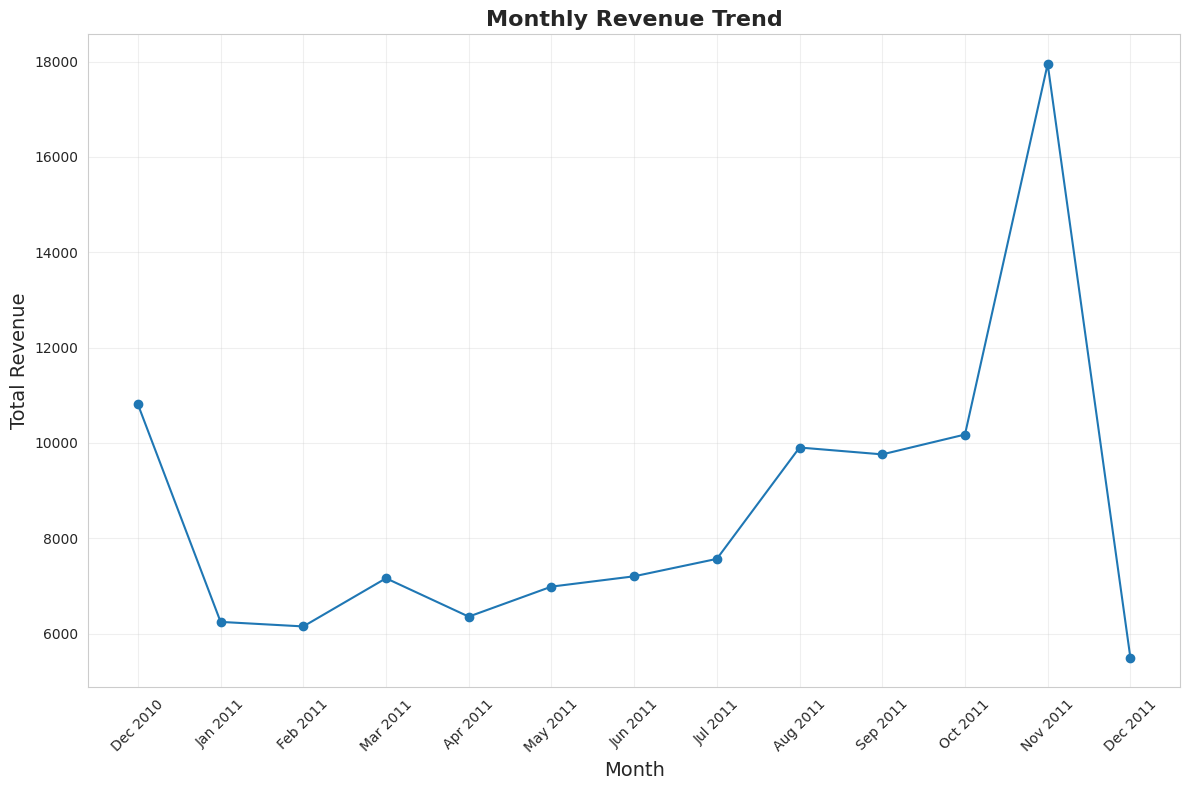

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))


monthly_revenue = dfa.groupby(dfa['InvoiceDate'].dt.to_period('M'))['TotalPrice'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp().strftime('%b %Y')

ax.plot(monthly_revenue.index, monthly_revenue.values, marker='o')

ax.set_title('Monthly Revenue Trend', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Total Revenue', fontsize=14)

plt.xticks(rotation=45)




ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Insight:

Tren naik terlihat jels dari Maret 2011 sampi November 2011.Puncak penjualan pda November 2011 sekitar 17.949 ju lebih tinggi ketimbang bulan lainnya. Tapi setelah itu menurun tajam dibulan Desember 2011 sekitar 5.496

Rekomendasi:
- Periode khir tahun memiliki potensi besar, fokus pda promosi besar di bulan Oktober-November ini adalah momentum.
- Siapkan stok & strategi pemasaran lebih mendalam.
- Perlu analisis lebih untuk bulan Desember


5. Hari apa yang memiliki transaksi tertinggi berdasarkan Total Revenue? Apakah ada pola penjualan mingguan?

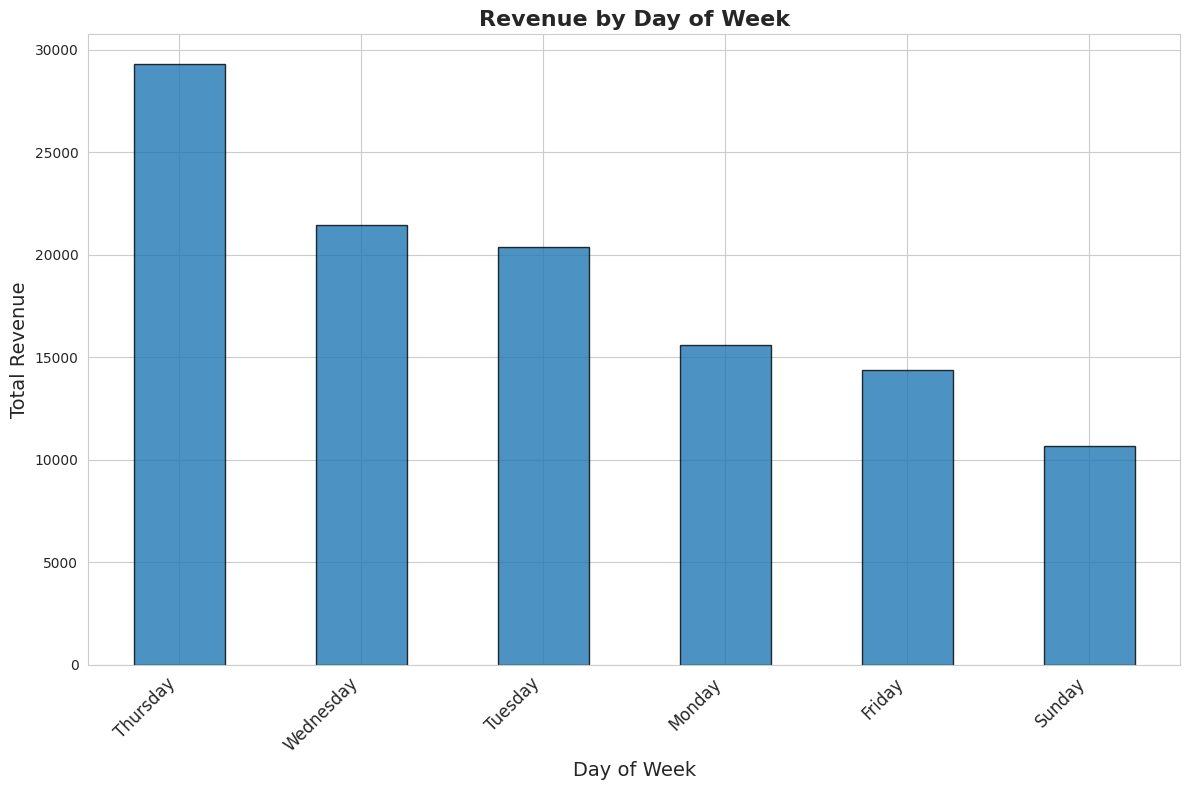

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))

weekday_revenue = dfa.groupby('DayOfWeek')['TotalPrice'].sum().sort_values(ascending=False)

ax = weekday_revenue.plot(kind='bar', alpha=0.8, edgecolor='black')

ax.set_title('Revenue by Day of Week', fontsize=16, fontweight='bold')
ax.set_xlabel('Day of Week', fontsize=14)
ax.set_ylabel('Total Revenue', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)


plt.tight_layout()
plt.show()


Insight:

Kamis pendapatan tertinggi 29.292 diikuti Rabu sekitar 21.462, artinya punck transaksi terjadi menjelang akhir minggu kerja, paling utama Kamis. Pling rendah Minggu sekitar 10.678.

Rekomendsi:
- Rabu dan Kamis kuatkan promosi dn penjualan bundling/upsell karena penjualn tinggi


Apakah ada hubungan antara Quantity & UnitPrice terhadap Total Revenue?

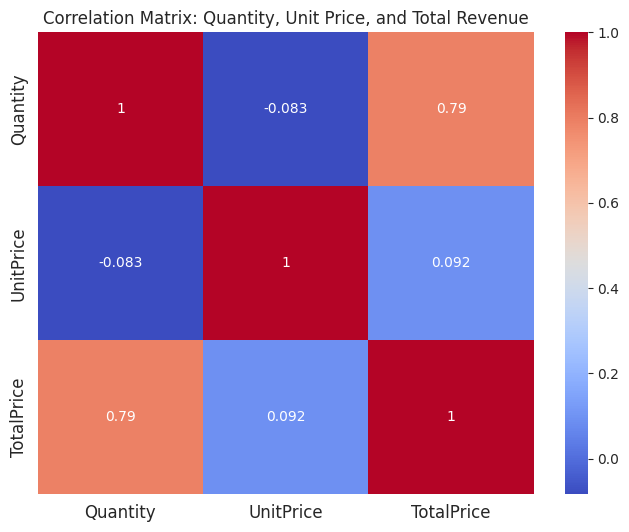

In [ ]:
plt.figure(figsize=(8,6))
corr = dfa[['Quantity', 'UnitPrice', 'TotalPrice']].corr()
#print(corr)
plt.title('Correlation Matrix: Quantity, Unit Price, and Total Revenue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

- Quantity memiliki korelasi positif kuat dengan Total Revenue (0.79). Artinya, semakin banyak barang yang dibeli pelanggan, semakin besar pendapatan yang dihasilkan.

- Unit Price memiliki korelasi sangat lemah dengan Total Revenue (0.092). Artinya, harga barang tidak terlalu berpengaruh langsung terhadap total pendapatan dibandingkan jumlah barang yang terjual

- Korelasi antara Quantity dan Unit Price sedikit negatif (-0.083). Artinya, barang yang lebh murah dibeli dalam jumlah lebih banyak ketimbang yang mahal.

Pendapatan lebih dipengaruhi oleh banyaknya penjualan (Quantity) dibanding perubahan harga (Unit Price).
